# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [5]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [6]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [7]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [8]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [9]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

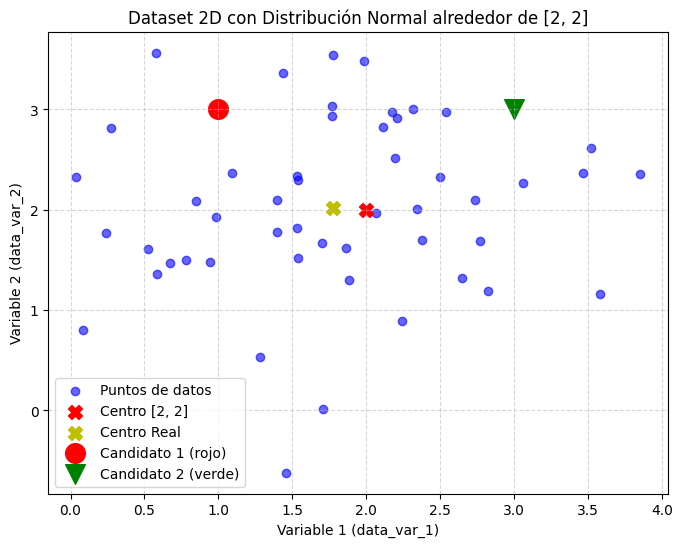

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


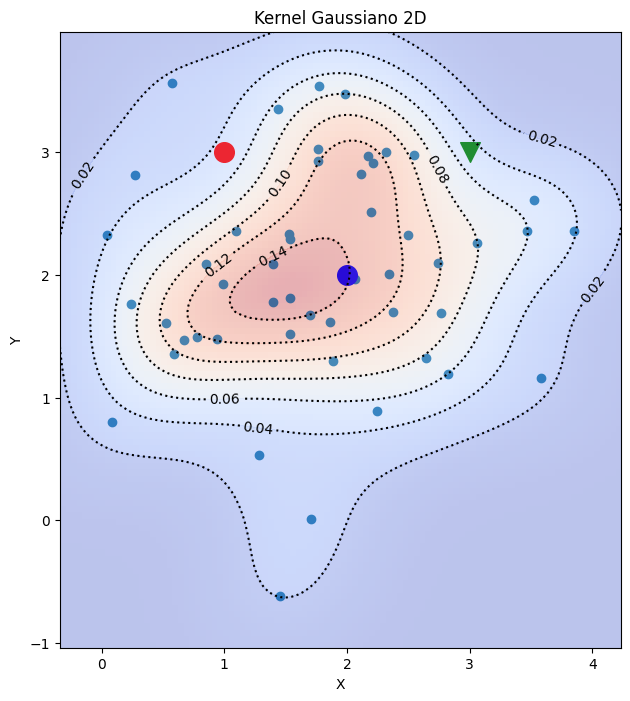

In [10]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

In [11]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica

# Dataset con Relación Lineal (dxr, dyr)
dxr, dyr = cargar_datasetRelacionLineal(
    factor=np.array([1, 0.5]),
    n_data_points=50,
    ds_center=ds_center)


# Dataset con Relación Cuadrática (dx2, dy2)
dx2, dy2 = cargar_datasetRelacionCuadratica(
    coeficientes=np.array([0.5, 0, 0]),
    n_data_points=50)



In [12]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [13]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov
print(f'Covarianza dataset con distribución normal:\n {np.cov(dx, dy)}')

print(f'Covarianza dataset con relación lineal :\n {np.cov(dxr, dyr)}')

print(f'Covarianza dataset con relación lineal Grande:\n {np.cov(dxGrande, dyGrande)}')

print(f'Covarianza dataset con relación cuadratica:\n {np.cov(dx2, dy2)}')


Covarianza dataset con distribución normal:
 [[0.87173739 0.08985489]
 [0.08985489 0.76444418]]
Covarianza dataset con relación lineal :
 [[0.87173739 0.91666484]
 [0.91666484 1.15270333]]
Covarianza dataset con relación lineal Grande:
 [[383.54554143 375.65364293]
 [375.65364293 467.25326789]]
Covarianza dataset con relación cuadratica:
 [[ 8.34535038 -1.24204787]
 [-1.24204787 15.18168342]]


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?
Basándose en el valor de la covarianza, el dataset con Relación Lineal Grande es el que muestra la mayor dependencia lineal (375.65), seguido muy de lejos por el dataset de Relación Lineal (0.916).

¿Cual es el problema que tiene la covarianza?
El problema es que la covarianza es sensible a la escala de los datos y no está normalizada. Diciendonos asi que puede existir un problema de escala entre la lineal y la lineal grande.

In [14]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef

print("COEFICIENTE DE CORRELACIÓN DE PEARSON")

# 1. Dataset Distribución Normal
corr_norm = np.corrcoef(dx, dy)
print(f'Correlación dataset con distribución normal:\n {corr_norm}')
print(f'Coeficiente: {corr_norm[0,1]:.4f}\n')

# 2. Dataset Relación Lineal
corr_lin = np.corrcoef(dxr, dyr)
print(f'Correlación dataset con relación lineal :\n {corr_lin}')
print(f'Coeficiente: {corr_lin[0,1]:.4f}\n')

# 3. Dataset Relación Lineal Grande
corr_grande = np.corrcoef(dxGrande, dyGrande)
print(f'Correlación dataset con relación lineal Grande:\n {corr_grande}')
print(f'Coeficiente: {corr_grande[0,1]:.4f}\n')

# (Opcional) Dataset Cuadrático para que veas la diferencia
corr_quad = np.corrcoef(dx2, dy2)
print(f'Correlación dataset con relación cuadrática:\n {corr_quad}')
print(f'Coeficiente: {corr_quad[0,1]:.4f}\n')

COEFICIENTE DE CORRELACIÓN DE PEARSON
Correlación dataset con distribución normal:
 [[1.         0.11007179]
 [0.11007179 1.        ]]
Coeficiente: 0.1101

Correlación dataset con relación lineal :
 [[1.         0.91444789]
 [0.91444789 1.        ]]
Coeficiente: 0.9144

Correlación dataset con relación lineal Grande:
 [[1.         0.88736636]
 [0.88736636 1.        ]]
Coeficiente: 0.8874

Correlación dataset con relación cuadrática:
 [[ 1.         -0.11034587]
 [-0.11034587  1.        ]]
Coeficiente: -0.1103



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

El dataset con Relación Lineal (el normal).
Ya que su Coeficiente de Pearson es 0.9144, que es el valor más alto y más cercano a 1 de todos los que se obtuvieron. Aunque el dataset "Lineal Grande" también tiene una dependencia muy alta (0.8874).

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?

El Coeficiente de Correlación de Pearson es mucho más fácil de interpretar, ya que es una escala fija: Pearson siempre va de -1 a 1.
1: Relación lineal positiva perfecta.
-1: Relación lineal negativa perfecta.
0: Sin relación lineal, existe una independencia de unidades es decir no importa si los datos son millones o decimales pequeños (como vimos con los datasets lineal vs grande), Pearson me da un número comparable.



# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [15]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

In [16]:
def distancia_euclidiana(p1, p2):
    # CORRECCIÓN: Euclideana es norma L2 (ord=2)
    dist = np.linalg.norm(p2 - p1, ord=2)
    print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist:.4f}')
    return dist

In [17]:
def distancia_manhattan(p1, p2):
   dist =  np.linalg.norm(p2 - p1, ord=1)
   print(f'Distancia manhattan del punto {p1} al punto {p2} = {dist}')
   return dist

In [18]:
# ← COMPLETAR Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
from scipy.spatial import distance

def distancia_chebyshev(p1, p2):
    dist = np.linalg.norm(p2 - p1, ord=np.inf)
    print(f'Distancia chebyshev del punto {p1} al punto {p2} = {dist:.4f}')
    return dist

def similitud_coseno(p1, p2):
    dist = distance.cosine(p1, p2)
    similitud = 1 - dist
    print(f'Similitud coseno del punto {p1} al punto {p2} = {similitud:.4f}')
    return similitud

def distancia_mahalanobis(p1, p2, data_matrix):
    # Mahalanobis requiere la matriz de covarianza inversa del dataset
    cov_matrix = np.cov(data_matrix, rowvar=False)
    # Inversa de la matriz de covarianza
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    dist = distance.mahalanobis(p1, p2, inv_cov_matrix)
    print(f'Distancia Mahalanobis del punto {p1} al punto {p2} = {dist:.4f}')
    return dist

def distancia_jaccard(p1, p2):
    # Jaccard se usa típicamente para conjuntos booleanos o binarios.
    # Si son vectores continuos, scipy los trata como booleanos (True si != 0).
    # Calculamos la disimilitud (distancia)
    dist = distance.jaccard(p1, p2)
    print(f'Distancia Jaccard del punto {p1} al punto {p2} = {dist:.4f}')
    return dist

In [19]:
# Ejecutar funciones
print("🔍 calculando las distancias de los puntos candidatos al centro")
print('Distancias primer dataset:\n')
data_1 = np.stack((dx, dy), axis=1)
ds_center =  np.mean(data_1, axis=0)
dist_euc1 = distancia_euclidiana(c1, ds_center)
dist_euc2 = distancia_euclidiana(c2, ds_center)

# Resto de distancias para c1
distancia_manhattan(c1, ds_center)
distancia_chebyshev(c1, ds_center)
similitud_coseno(c1, ds_center)
distancia_mahalanobis(c1, ds_center, data_1)

print('Distancias segundo dataset:\n')

data_2 = np.stack((dxr, dyr), axis=1)
ds_center_2 = np.mean(data_2, axis=0)

print(f"Centro: {ds_center_2}")
distancia_euclidiana(c1, ds_center_2)
distancia_manhattan(c1, ds_center_2)
distancia_chebyshev(c1, ds_center_2)
similitud_coseno(c1, ds_center_2)
distancia_mahalanobis(c1, ds_center_2, data_2)

# 3. Dataset Relación Lineal Grande (dxGrande, dyGrande)
print('\n--- Distancias TERCER dataset (Lineal Grande) ---')
data_3 = np.stack((dxGrande, dyGrande), axis=1)
ds_center_3 = np.mean(data_3, axis=0)

print(f"Centro: {ds_center_3}")
distancia_euclidiana(c1, ds_center_3)
distancia_manhattan(c1, ds_center_3)
distancia_chebyshev(c1, ds_center_3)
similitud_coseno(c1, ds_center_3)
distancia_mahalanobis(c1, ds_center_3, data_3)

# 4. Dataset Relación Cuadrática (dx2, dy2)
print('\n--- Distancias CUARTO dataset (Relación Cuadrática) ---')
data_4 = np.stack((dx2, dy2), axis=1)
ds_center_4 = np.mean(data_4, axis=0)

print(f"Centro: {ds_center_4}")
distancia_euclidiana(c1, ds_center_4)
distancia_manhattan(c1, ds_center_4)
distancia_chebyshev(c1, ds_center_4)
similitud_coseno(c1, ds_center_4)
distancia_mahalanobis(c1, ds_center_4, data_4)

🔍 calculando las distancias de los puntos candidatos al centro
Distancias primer dataset:

Distancia euclidiana del punto [1 3] al punto [1.77452609 2.01778087] = 1.2509
Distancia euclidiana del punto [3 3] al punto [1.77452609 2.01778087] = 1.5705
Distancia manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567452242759078
Distancia chebyshev del punto [1 3] al punto [1.77452609 2.01778087] = 0.9822
Similitud coseno del punto [1 3] al punto [1.77452609 2.01778087] = 0.9212
Distancia Mahalanobis del punto [1 3] al punto [1.77452609 2.01778087] = 1.4771
Distancias segundo dataset:

Centro: [1.77452609 1.78341653]
Distancia euclidiana del punto [1 3] al punto [1.77452609 1.78341653] = 1.4422
Distancia manhattan del punto [1 3] al punto [1.77452609 1.78341653] = 1.9911095647660244
Distancia chebyshev del punto [1 3] al punto [1.77452609 1.78341653] = 1.2166
Similitud coseno del punto [1 3] al punto [1.77452609 1.78341653] = 0.8955
Distancia Mahalanobis del punto [1 3] al punt

np.float64(0.5928820840026329)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?

- Distancia Euclidiana
- Distancia Manhattan
- Distancia Chebyshev
- Similitud de Coseno
- Distancia de Jaccard
Todas estas medidas solo necesitan las coordenadas de los dos puntos (p1,p2) para calcularse. No les importa el resto de los datos que los rodean.

¿Qué medidas de disimilitud son de un punto a una distribución?

- Distancia de Mahalanobis
Para calcular la distancia de Mahalanobis entre dos puntos, se necesita conocer la matriz de covarianza del conjunto de datos completo. Esto significa que la distancia depende de la distribución.

¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?

Sí.
La distancia de Mahalanobis utiliza la matriz de covarianza para "normalizar" las distancias. Esto significa que tiene en cuenta:
La escala de cada variable (si X varía mucho más que Y, Mahalanobis ajusta eso).
La correlación entre variables (si los datos forman una línea diagonal, Mahalanobis sabe que moverse a lo largo de esa línea es "más corto" que moverse perpendicularmente a ella).

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [20]:
import itertools as it
import numpy as np
import matplotlib.pyplot as plt

# TODO 4.1 completar el codigo
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))

    for pair in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            mD[pair] = distancia(X[pair[0]], X[pair[1]], X)
        else:
            # Para distancias simples (Euclidiana, etc.)
            mD[pair] = distancia(X[pair[0]], X[pair[1]])

    return mD

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0000
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 0.9519
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.0123
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.0658
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.0168
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 0.9502
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 1.5890
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.6887
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9662
Distancia euclidiana del punto [2.49671415 2.32408397] al pu

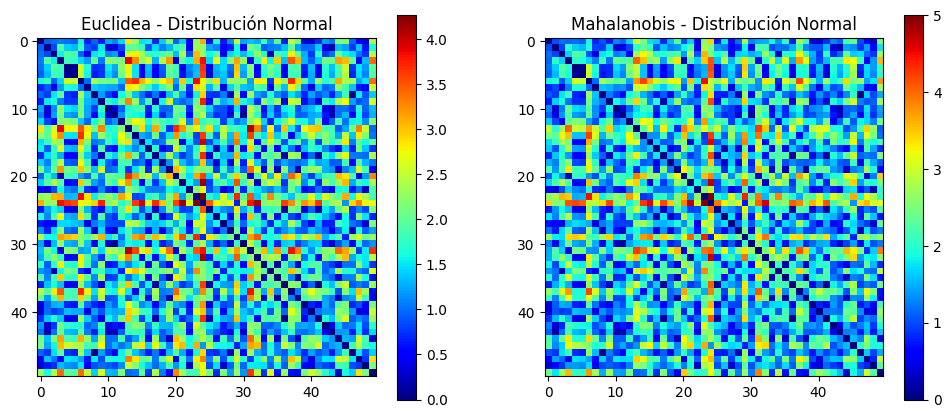

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [2.49671415 2.65875614] = 0.0000
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [1.8617357  1.66919456] = 1.1758
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [2.64768854 2.30922754] = 0.3807
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [3.52302986 3.828868  ] = 1.5564
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [1.76584663 2.28134639] = 0.8226
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [1.76586304 2.2315031 ] = 0.8466
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [3.57921282 3.15960405] = 1.1927
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [2.76743473 2.61282854] = 0.2746
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [1.53052561 1.69615733] = 1.3639
Distancia euclidiana del punto [2.49671415 2.65875614] al pu

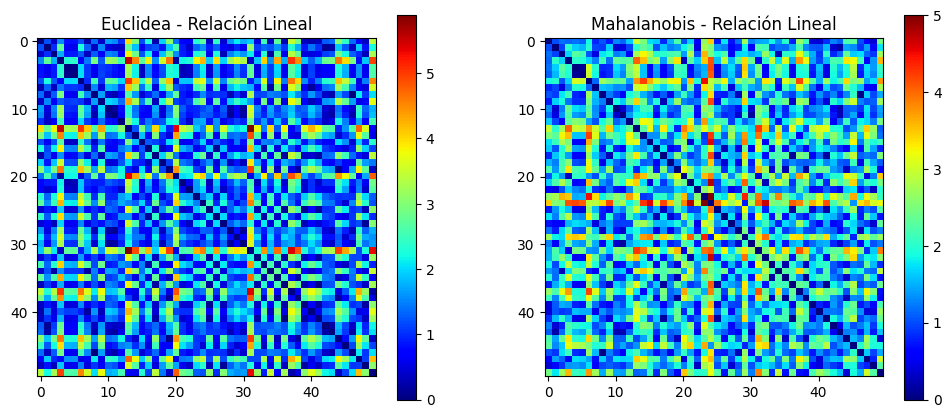

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [-1.25459881  1.63556614] = 0.0000
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [ 4.50714306 10.35408513] = 10.4504
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [2.31993942 2.55817034] = 3.6917
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [0.98658484 0.14068264] = 2.6940
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [-3.4398136  4.217219 ] = 3.3823
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [-3.4400548   5.08983005] = 4.0876
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [-4.41916388  9.23519397] = 8.2322
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [3.66176146 7.91896631] = 7.9782
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [1.01115012 0.90605712] = 2.3803
Distancia euclidiana del punto [-

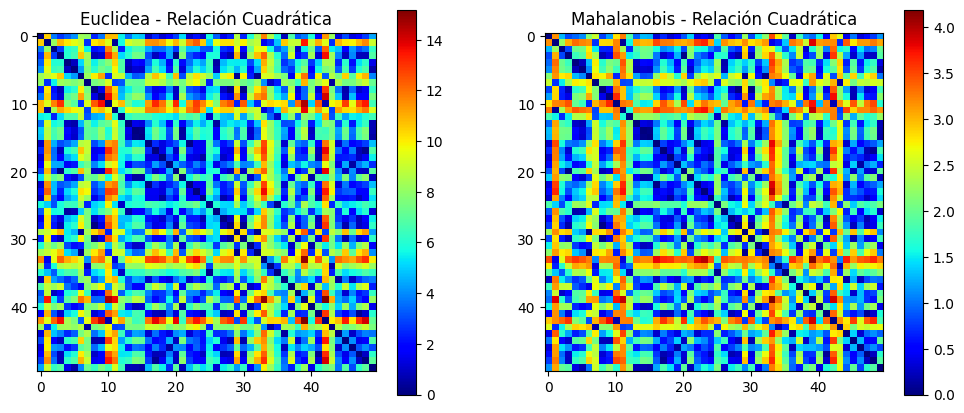

In [21]:
 # ← COMPLETAR calcule y grafique la matriz de distancias para todos los datasets y use la medida de disimilitud euclidiana y mahalanobis
# calculamos primero la matriz de covarianzas

#No pongo la relacion grande porque la memoria colapsa

datasets_todos = [
    ("Distribución Normal", data_1),
    ("Relación Lineal", data_2),
    ("Relación Cuadrática", data_4)
]

# Iteramos por cada dataset para calcular y graficar
for nombre, dataset in datasets_todos:
    print(f"\n--- Procesando: {nombre} ---")

    # 1. Matriz Euclidiana
    # (No pasamos mC, así que usa la lógica 'else' de tu función)
    Ma_euclidea = matriz_distancias(dataset, distancia_euclidiana)

    # 2. Matriz Mahalanobis
    # (Pasamos mC=True para que tu función le pase el dataset completo a distancia_mahalanobis)
    Ma_mahalanobis = matriz_distancias(dataset, distancia_mahalanobis, mC=True)

    # 3. Graficar
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Mapa de calor Euclidiana
    im1 = ax[0].imshow(Ma_euclidea, cmap='jet')
    ax[0].set_title(f'Euclidea - {nombre}')
    plt.colorbar(im1, ax=ax[0])

    # Mapa de calor Mahalanobis
    im2 = ax[1].imshow(Ma_mahalanobis, cmap='jet')
    ax[1].set_title(f'Mahalanobis - {nombre}')
    plt.colorbar(im2, ax=ax[1])

    plt.show()


Text(0.5, 1.0, 'Mahalanobis')

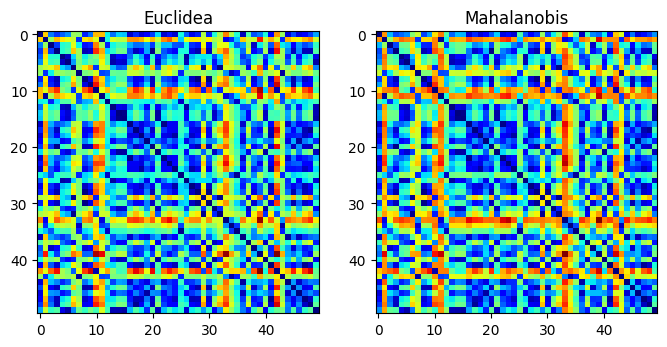

In [22]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Ma_euclidea, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

In [23]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)

    mS = 1 / (1 + mD)

    return mS


--- Matriz de Similitud Relación Lineal) ---
--- Matrices de Similitud (Euclidiana) ---
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0000
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 0.9519
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.0123
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.0658
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.0168
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 0.9502
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 1.5890
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.6887
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9662
Distancia euclidiana del punto [2.4967

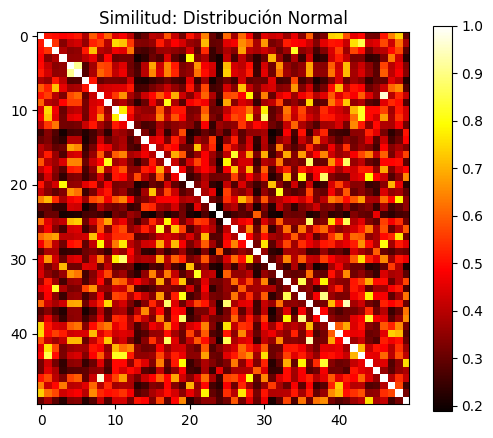

Distancia euclidiana del punto [2.49671415 2.65875614] al punto [2.49671415 2.65875614] = 0.0000
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [1.8617357  1.66919456] = 1.1758
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [2.64768854 2.30922754] = 0.3807
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [3.52302986 3.828868  ] = 1.5564
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [1.76584663 2.28134639] = 0.8226
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [1.76586304 2.2315031 ] = 0.8466
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [3.57921282 3.15960405] = 1.1927
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [2.76743473 2.61282854] = 0.2746
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [1.53052561 1.69615733] = 1.3639
Distancia euclidiana del punto [2.49671415 2.65875614] al punto [2.54256004 3.03033261] = 0.3744
Distancia euclidiana del punto

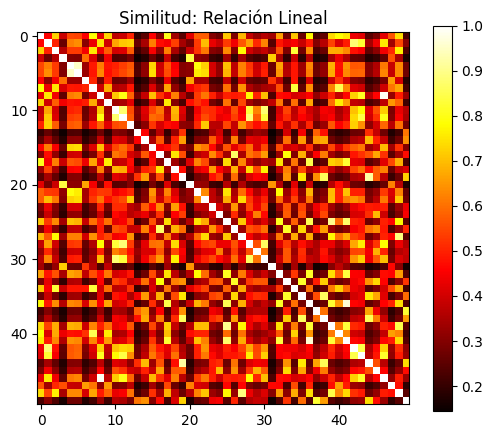

Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [-1.25459881  1.63556614] = 0.0000
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [ 4.50714306 10.35408513] = 10.4504
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [2.31993942 2.55817034] = 3.6917
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [0.98658484 0.14068264] = 2.6940
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [-3.4398136  4.217219 ] = 3.3823
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [-3.4400548   5.08983005] = 4.0876
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [-4.41916388  9.23519397] = 8.2322
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [3.66176146 7.91896631] = 7.9782
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [1.01115012 0.90605712] = 2.3803
Distancia euclidiana del punto [-1.25459881  1.63556614] al punto [2.08072578 0.13883601] = 3.6558
D

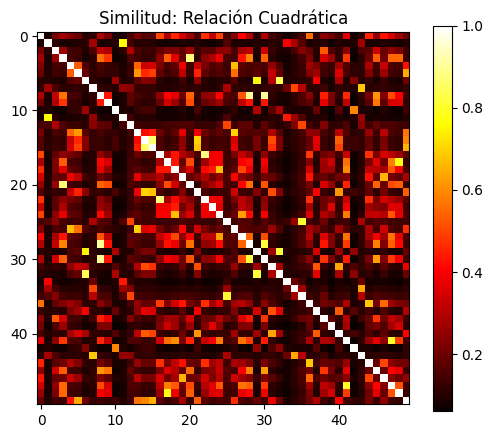

In [27]:
# Graficar la matriz de similitud

print("\n--- Matriz de Similitud Relación Lineal) ---")
datasets_similitud = [
    ("Distribución Normal", data_1),
    ("Relación Lineal", data_2),
    ("Relación Cuadrática", data_4)
]

print("--- Matrices de Similitud (Euclidiana) ---")

for nombre, dataset in datasets_similitud:
    # Calcular matriz de similitud
    Ma_sim = matriz_similitud(dataset, distancia_euclidiana)

    # Graficar
    plt.figure(figsize=(6, 5))
    plt.imshow(Ma_sim, cmap='hot')
    plt.title(f'Similitud: {nombre}')
    plt.colorbar()
    plt.show()

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?
Similitud: Los valores altos (colores brillantes/calientes) indican puntos que son muy parecidos. La diagonal principal siempre es el valor máximo (1.0), lo que visualmente crea una línea de referencia clara. Es fácil ver "bloques" de colores brillantes que representan grupos de datos similares.


# 🚀 ¡TALLER FINALIZADO!"